In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [5]:
neo = pd.read_csv("neo.csv")

# neo = neo.sample(1000) # Smaller sample for demonstration purposes

neo.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [6]:
neo = neo[["est_diameter_min", "est_diameter_max", "relative_velocity", "miss_distance", "absolute_magnitude", "hazardous"]]
neo.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True


In [7]:
print("Hazardous Asteroids amount:", neo.query('hazardous == True').hazardous.count(), "\nNon-hazardous Asteroids amount:", neo.query('hazardous == False').hazardous.count())
proportion = "%.3f" % ((neo.query('hazardous == True').hazardous.count()/neo.hazardous.count())*100)
print("Approximately, ", proportion, "% of the nearby asteroids are hazardous.", sep='')

Hazardous Asteroids amount: 8840 
Non-hazardous Asteroids amount: 81996
Approximately, 9.732% of the nearby asteroids are hazardous.


In [156]:
# ### Making data amounts proportionate:

# neo_false_half = neo.query('hazardous == False').sample(8840)

# to_combine = [neo.query('hazardous == True'), neo_false_half]
# neo = pd.concat(to_combine)
# neo.sample(10)

In [157]:
print("Smallest values:\n", neo.min(), "\n\n\nLargest values:\n" , neo.max())

Smallest values:
 est_diameter_min         0.000609
est_diameter_max         0.001362
relative_velocity      203.346433
miss_distance         6745.532516
absolute_magnitude           9.23
hazardous                   False
dtype: object 


Largest values:
 est_diameter_min             37.89265
est_diameter_max            84.730541
relative_velocity       236990.128088
miss_distance         74798651.452197
absolute_magnitude               33.2
hazardous                        True
dtype: object


In [158]:
print("Average values:\n" , neo.mean(), "\n\n\nMedian values:\n" , neo.median())

Average values:
 est_diameter_min      1.274321e-01
est_diameter_max      2.849469e-01
relative_velocity     4.806692e+04
miss_distance         3.706655e+07
absolute_magnitude    2.352710e+01
hazardous             9.731824e-02
dtype: float64 


Median values:
 est_diameter_min      4.836765e-02
est_diameter_max      1.081534e-01
relative_velocity     4.419012e+04
miss_distance         3.784658e+07
absolute_magnitude    2.370000e+01
hazardous             0.000000e+00
dtype: float64


array([[<AxesSubplot:title={'center':'est_diameter_min'}>]], dtype=object)

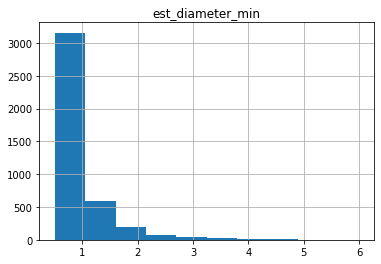

In [159]:
neo.hist(column="est_diameter_min", range=[.5, 6])

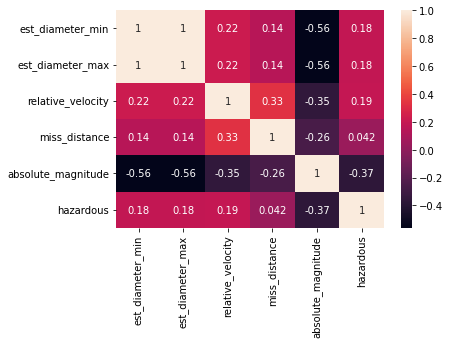

In [160]:
correlation_mat = neo.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [161]:
# Splitting the data into input and output columns
X, y = neo.values[:, :-1], neo.values[:, -1]

# ensure all values are floatinf types
X = X.astype('float32')

# Encode strings to integer
y = LabelEncoder().fit_transform(y)

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Determine the number of features
n_features = X_train.shape[1]
print('Number of features:', n_features)

(60860, 5) (29976, 5) (60860,) (29976,)
Number of features: 5


In [162]:
# Step-1 Define Model
model= Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))  # Hidden Layer
model.add(Dense(8, activation='relu', kernel_initializer='he_normal')) # Hidden Layer
model.add(Dense(1, activation='sigmoid'))  # Output Layer
          
# Step-2 Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])
          
# Step-3 Fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=2) # Hint: You can change the verbose value to 2 to see epochs
          
# Step-4 Evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy : %.3f' %acc)

Epoch 1/150
1902/1902 - 3s - loss: 95959.5234 - accuracy: 0.8269 - 3s/epoch - 2ms/step
Epoch 2/150
1902/1902 - 2s - loss: 5384.5723 - accuracy: 0.8205 - 2s/epoch - 1ms/step
Epoch 3/150
1902/1902 - 2s - loss: 3596.8945 - accuracy: 0.8197 - 2s/epoch - 1ms/step
Epoch 4/150
1902/1902 - 2s - loss: 2089.9946 - accuracy: 0.8170 - 2s/epoch - 1ms/step
Epoch 5/150
1902/1902 - 2s - loss: 272.3948 - accuracy: 0.8181 - 2s/epoch - 1ms/step
Epoch 6/150
1902/1902 - 2s - loss: 15.8184 - accuracy: 0.8298 - 2s/epoch - 1ms/step
Epoch 7/150
1902/1902 - 2s - loss: 15.2469 - accuracy: 0.8633 - 2s/epoch - 1ms/step
Epoch 8/150
1902/1902 - 2s - loss: 0.3179 - accuracy: 0.9031 - 2s/epoch - 1ms/step
Epoch 9/150
1902/1902 - 2s - loss: 0.3179 - accuracy: 0.9031 - 2s/epoch - 1ms/step
Epoch 10/150
1902/1902 - 2s - loss: 0.3180 - accuracy: 0.9031 - 2s/epoch - 1ms/step
Epoch 11/150
1902/1902 - 2s - loss: 0.3179 - accuracy: 0.9031 - 2s/epoch - 1ms/step
Epoch 12/150
1902/1902 - 2s - loss: 0.3179 - accuracy: 0.9031 - 2s/e

KeyboardInterrupt: 

In [ ]:
# Step-5 Make a prediction
row=[[0.646480, 1.445573, 43098.374254, 0.000000464056, 18.070]]
prediction = model.predict(row)

if prediction == 0: prediction = False
else: prediction = True

print('Predicted:', prediction)

1/1 [==============================] - 0s 100ms/step
Predicted: False
